In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from CSV file
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Select the first 50 rows for analysis
df=df.head(50)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Check the shape of the dataset (rows, columns)
df.shape

(50, 5)

In [5]:
#  Check the data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              50 non-null     int64 
 1   Gender                  50 non-null     object
 2   Age                     50 non-null     int64 
 3   Annual Income (k$)      50 non-null     int64 
 4   Spending Score (1-100)  50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# Generate summary statistics for numeric columns (mean, min, max)
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,35.280000,27.400000,49.48000
std,14.57738,13.751497,8.369039,30.21774
min,1.00000,18.000000,15.000000,3.00000
25%,13.25000,23.250000,20.000000,26.50000
50%,25.50000,31.000000,28.000000,44.50000
75%,37.75000,45.750000,34.000000,75.75000
max,50.00000,67.000000,40.000000,99.00000


In [6]:
# Check for missing values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
# Check for duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

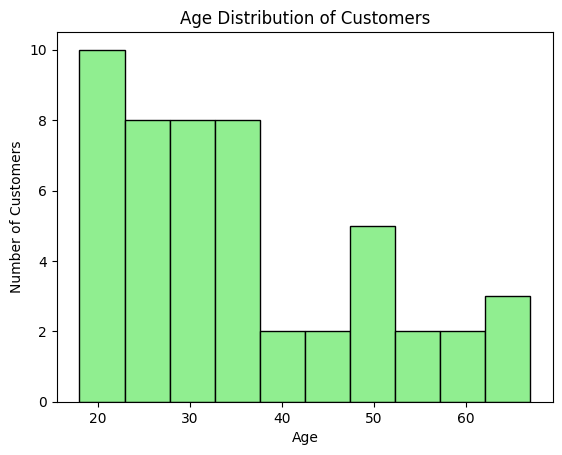

In [9]:
# Plot histogram for Age distribution before scaling
plt.hist(df['Age'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


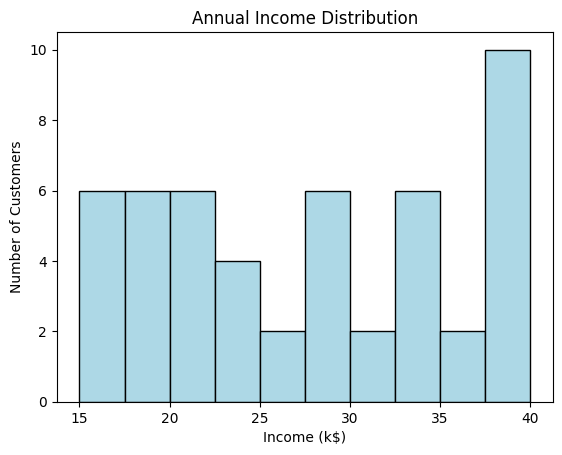

In [10]:
# Plot histogram for Annual Income distribution before scaling
plt.hist(df['Annual Income (k$)'], bins=10, color='lightblue', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Income (k$)')
plt.ylabel('Number of Customers')
plt.show()

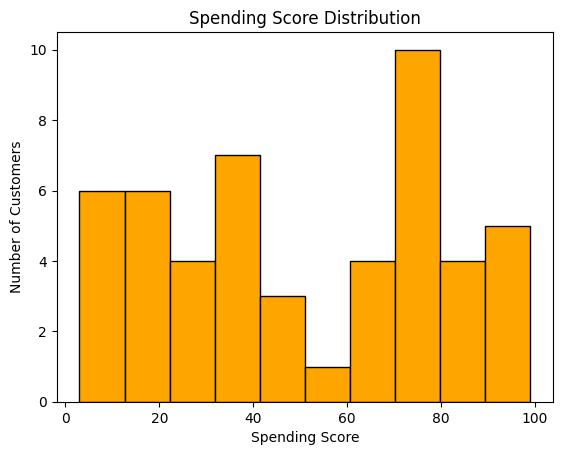

In [11]:
# Plot histogram for Spending Score distribution before scaling
plt.hist(df['Spending Score (1-100)'], bins=10, color='orange', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customers')
plt.show()

In [13]:
# Scale numeric columns (Age, Annual Income, Spending Score) using MinMaxScaler
scaler = MinMaxScaler()
df.loc[:, ['Age','Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.020408,0.00,0.375000
1,2,Male,0.061224,0.00,0.812500
2,3,Female,0.040816,0.04,0.031250
3,4,Female,0.102041,0.04,0.770833
4,5,Female,0.265306,0.08,0.385417


In [15]:
# Replace Gender values with short codes for easier analysis
df.loc[:, "Gender"] = df["Gender"].replace({"Male": "M", "Female": "F"})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,M,0.020408,0.00,0.375000
1,2,M,0.061224,0.00,0.812500
2,3,F,0.040816,0.04,0.031250
3,4,F,0.102041,0.04,0.770833
4,5,F,0.265306,0.08,0.385417
5,6,F,0.081633,0.08,0.760417
6,7,F,0.346939,0.12,0.031250
7,8,F,0.102041,0.12,0.947917
8,9,M,0.938776,0.16,0.000000
9,10,F,0.244898,0.16,0.718750


In [16]:
# Calculate average Spending Score by Gender
average_spending=df.groupby('Gender')['Spending Score (1-100)'].mean()
average_spending

,Spending Score (1-100)
Gender,
F,0.488932
M,0.475694


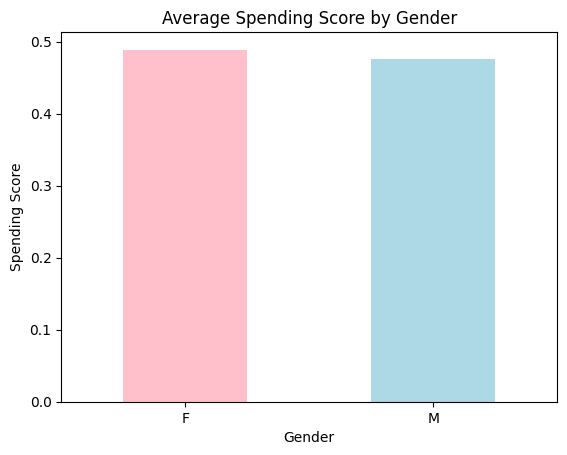

In [17]:
# Plot bar chart of average Spending Score by Gender
average_spending=df.groupby('Gender')['Spending Score (1-100)'].mean()
average_spending.plot(kind='bar', color=['pink','lightblue'])
plt.title('Average Spending Score by Gender')
plt.ylabel('Spending Score')
plt.xticks(rotation=0)
plt.show()


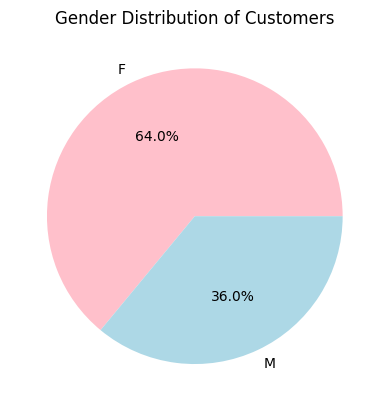

In [18]:
# Plot pie chart for Gender distribution
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink','lightblue'])
plt.title('Gender Distribution of Customers')
plt.show()

In [19]:
# Display all male customers in the dataset
df.loc[df['Gender']=='M']

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,M,0.020408,0.00,0.375000
1,2,M,0.061224,0.00,0.812500
8,9,M,0.938776,0.16,0.000000
10,11,M,1.000000,0.16,0.114583
14,15,M,0.387755,0.20,0.104167
15,16,M,0.081633,0.20,0.791667
17,18,M,0.040816,0.24,0.656250
18,19,M,0.693878,0.32,0.270833
20,21,M,0.346939,0.36,0.333333
21,22,M,0.142857,0.36,0.729167
